## Para melhorar o desempenho de um algoritmo evolutivo, algumas estratégias comuns incluem:

- Ajuste de parâmetros: Experimentar diferentes valores para os parâmetros do algoritmo, como taxa de crossover, taxa de mutação, tamanho da população, etc., pode ajudar a encontrar configurações que funcionem melhor para o problema em questão.

- Estratégias de seleção: Usar diferentes estratégias de seleção, como seleção por torneio, seleção por roleta, etc., pode afetar o desempenho do algoritmo.

- Operadores genéticos: Experimentar diferentes operadores genéticos, como diferentes métodos de crossover e mutação, pode melhorar o desempenho do algoritmo.

- Elitismo: O uso de elitismo, onde as melhores soluções são preservadas de uma geração para a próxima, pode ajudar a evitar a perda prematura de boas soluções.

- Inicialização da população: Uma boa inicialização da população pode acelerar a convergência do algoritmo. Experimentar diferentes métodos de inicialização, como inicialização aleatória ou heurísticas, pode ser útil.

- Paralelismo: Em alguns casos, paralelizar o algoritmo evolutivo pode acelerar significativamente a busca por soluções.

## Diversidade


Se há apenas 1 ou 2 pontos no gráfico tridimensional, pode indicar que os valores das variáveis de decisão dos indivíduos estão muito próximos entre si, o que reduz a capacidade de visualizar a diversidade da população. Isso pode ser resultado de várias situações, como:

Baixa diversidade na população devido à seleção ou operadores genéticos que favorecem a convergência para soluções similares.
Um espaço de busca limitado ou restrições que restringem a variação das variáveis de decisão.
Um problema onde as soluções ideais estão localizadas muito próximas umas das outras no espaço de busca.
Para aumentar a diversidade na visualização, podem ser tomadas algumas medidas:

Ajustar os operadores genéticos, como o operador de mutação, para aumentar a exploração do espaço de busca.
Introduzir mecanismos de diversidade na seleção, como o uso de torneios com seleção baseada na distância entre soluções.
Explorar uma maior variedade de valores iniciais para os indivíduos da população inicial.
Verificar se as funções de avaliação estão corretamente definidas para capturar a diversidade do problema.

## Prog Linear

## RCE 3 etapas

In [9]:
import random

class Individual:
    def __init__(self, variables):
        self.variables = variables
        self.fitness = None  # Inicializa o atributo de fitness como None

class EliteSetSelector:
    def __init__(self, population, p):
        self.population = population
        self.p = p

    def create_population(self, population_size, num_variables):
        population = []
        for _ in range(population_size):
            variables = [random.uniform(0, 1) for _ in range(num_variables)]
            population.append(Individual(variables))
        return population

    def initialize_population_fitness(self):
        for ind in self.population:
            # Aqui você chamaria a função de avaliação para atribuir o fitness de cada indivíduo
            ind.fitness = self.evaluate_individual(ind)

    def evaluate_individual(self, ind):
        # Implemente a função de avaliação para calcular o fitness de um indivíduo
        # Esta é apenas uma função de exemplo, substitua pela sua lógica real
        return random.uniform(0, 1)

    def select_candidates(self):
        self.initialize_population_fitness()  # Garante que o fitness dos indivíduos seja inicializado
        sorted_population = sorted(self.population, key=lambda ind: ind.fitness, reverse=True)
        best_fitness = sorted_population[0].fitness
        candidates = []
        for ind in sorted_population:
            if (best_fitness - ind.fitness) / best_fitness <= self.p:
                candidates.append(ind)
            else:
                break
        return candidates

    def determine_elite_set(self, candidates, min_difference):
        elite_set = []
        while candidates:
            current_ind = candidates.pop(0)
            is_significantly_different = True
            for other_ind in elite_set:
                if self._calculate_difference(current_ind, other_ind) < min_difference:
                    is_significantly_different = False
                    break
            if is_significantly_different:
                elite_set.append(current_ind)
            else:
                if len(candidates) == 0:
                    break
        return elite_set

    def _calculate_difference(self, ind1, ind2):
        differences = 0
        for var1, var2 in zip(ind1.variables, ind2.variables):
            if abs(var1 - var2) >= self.p:  # Ignora min_vars_difference e usa o parâmetro p
                differences += 1
        return differences

# Exemplo de uso
population_size = 100
num_variables = 5
p = 0.1  # parâmetro p
min_difference = 2  # número mínimo de diferenças fenotípicas

selector = EliteSetSelector([], p)
population = selector.create_population(population_size, num_variables)
selector.population = population

candidates = selector.select_candidates()
elite_set = selector.determine_elite_set(candidates, min_difference)

print(f'Elite set size: {len(elite_set)}\n')
c = 0   
for ind in elite_set:
    print("\nIndividuo ", c+1, "\nGenes = ", ind.variables, "\nFitness = ", ind.fitness, sep=" ")
    c += 1


Elite set size: 8


Individuo  1 
Genes =  [0.12390585552310895, 0.9201412784774313, 0.2601850523434933, 0.13829884647692725, 0.9020707609153713] 
Fitness =  0.9999941536121992

Individuo  2 
Genes =  [0.3746890071979788, 0.0054236839563716055, 0.25122984349662136, 0.5222196075002588, 0.4236900039767222] 
Fitness =  0.9958003380315921

Individuo  3 
Genes =  [0.567402753391266, 0.231085163846388, 0.05113457346539263, 0.9862661771711674, 0.6294021100773669] 
Fitness =  0.964536553823493

Individuo  4 
Genes =  [0.07106223036692938, 0.9843860467090538, 0.05966668703964617, 0.7469660204522247, 0.9785252446823964] 
Fitness =  0.9517538814908962

Individuo  5 
Genes =  [0.066080168147022, 0.0993295728730984, 0.27429985882198904, 0.05830196994819581, 0.021615336510565353] 
Fitness =  0.9386879824827771

Individuo  6 
Genes =  [0.3774551870721571, 0.08969736259439853, 0.2708221556923571, 0.9852395496031676, 0.6688966215551555] 
Fitness =  0.9281172058366458

Individuo  7 
Genes =  [0.98256844

## RCE



Alg evolutivo Sem repopulação

Best solution variables =
 [56.554772178572705, 34.819403286617444, 32.35120238188776, 21.276084998306914, 21.276084998306914, 13.124458416917435, 10.467486016313641, 10.083273143337738, 9.211125376467297, 6.6041003786736105, 5.415407852896767, 5.668472158242192, 5.1572526339226705, 3.307163715068075, 3.3510863478919326, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.307163715068075, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.19738888783775, 3.1973

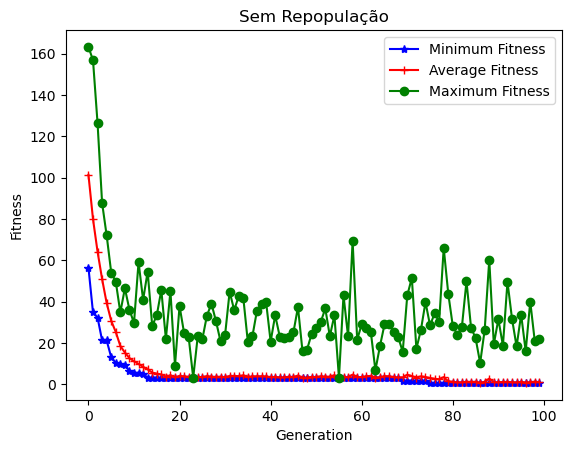

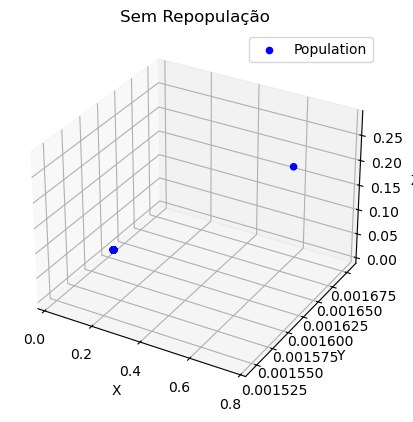


Alg evolutivo com repopulação

Best solution variables =
 [0.9489944849186794, 0.0070079046885644924, 0.03623332206184457, 0.00612159229779885, 0.062235661082906346, 0.0024901710505531582, -0.012823065289727209, 0.003109505140440727, -0.04918477491472997, -1.0131346185427446]

Best solution fitness =  4.01736974904094


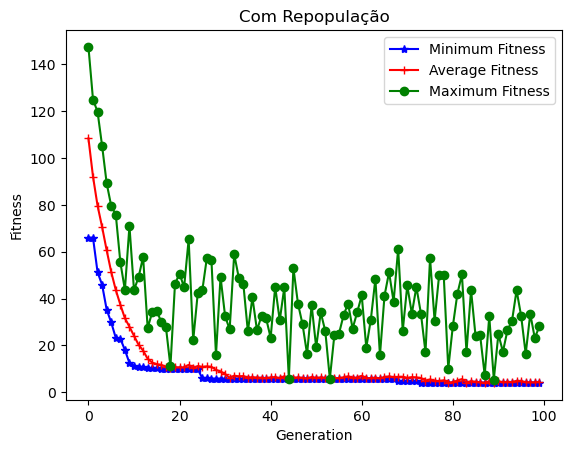

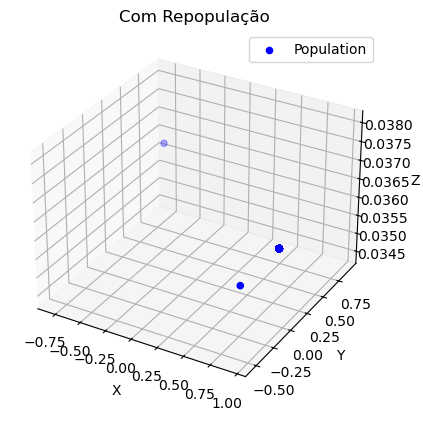

Total execution time: 1.83 seconds


In [2]:
import numpy as np
import math
from deap import base, creator, tools
import random
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
import pandas as pd


class EvolutionAlgorithm:
    def __init__(self, setup):
        self.setup = setup
        self.stats = tools.Statistics(key=lambda ind: ind.fitness.values)
        self.stats.register("avg", np.mean)
        self.stats.register("std", np.std)
        self.stats.register("min", np.min)
        self.stats.register("max", np.max)
        self.logbook = tools.Logbook()
        self.hof = tools.HallOfFame(1)
        self.pop = self.setup.toolbox.population(n=self.setup.POP_SIZE)
        self.hof.update(self.pop)
        self.repopulation_counter = 0
        self.allFitnessValues = []
        self.best_solutions_array = []

    def evaluate_population(self, population):
        fitnesses = map(self.setup.toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = [fit]

    def run(self):
        for g in range(self.setup.NGEN):
            offspring = self.setup.toolbox.select(self.pop, k=len(self.pop))
            offspring = [self.setup.toolbox.clone(ind) for ind in offspring]

            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < self.setup.CXPB:
                    self.setup.toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < self.setup.MUTPB:
                    self.setup.toolbox.mutate(mutant)
                    del mutant.fitness.values

            self.evaluate_population(offspring)

            for ind in self.pop:
         
                self.allFitnessValues.append(ind.fitness.values)

            self.hof.update(self.pop)

            if self.setup.num_repopulation != 0 and (g + 1) % self.setup.num_repopulation == 0:
                # Passo 1: Verifica se é necessário aplicar o RCE
                if self.check_apply_rce():
                    self.setup.toolbox.repopulate()

            else:
                self.pop[:] = offspring

            record = self.stats.compile(self.pop)
            self.logbook.record(gen=g, **record)

            self.best_solutions_array.append(self.hof[0].fitness.values)

        return self.pop, self.logbook, self.hof[0]

    def check_apply_rce(self):
        # Passo 2: Calcula o rendimento do melhor indivíduo em comparação com os melhores indivíduos anteriores
        delta = self.calculate_performance(self.hof[:self.setup.POP_SIZE])
        
        # Passo 3: Validação usando três ifs
        if delta > 0.1:
            # Se o rendimento for maior que 0.1, retorna True para aplicar o RCE
            print("\nAplicando RCE...")
            return True
        elif 0.05 < delta <= 0.1:
            # Se o rendimento estiver entre 0.05 e 0.1, pode-se tomar alguma ação específica
            print("Rendimento moderado. Alguma ação específica pode ser tomada aqui.")
        else:
            # Se o rendimento for menor ou igual a 0.05, não aplica o RCE
            print("Rendimento baixo. RCE não será aplicado.")
            return False

    def calculate_performance(self, best_individuals):
        # Aqui você implementaria sua função para calcular o rendimento do melhor indivíduo
        # em comparação com os melhores indivíduos anteriores
        # Esta é apenas uma função de exemplo, substitua-a pela sua lógica real
        return 0.2  # Apenas um valor de exemplo, substitua pelo cálculo real


class Setup:
    def __init__(self):
        self.CXPB, self.MUTPB, self.NGEN, self.POP_SIZE = 0.9, 0.05, 100, 100
        self.IND_SIZE = 10
        self.evaluations = 0
        self.num_repopulation = int(self.NGEN * 0.20)

        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMin)

        self.toolbox = base.Toolbox()
        self.toolbox.register("attribute", random.random)
        self.toolbox.register("individual", tools.initRepeat, creator.Individual, self.toolbox.attribute,
                              n=self.IND_SIZE)
        self.toolbox.register("population", tools.initRepeat, list, self.toolbox.individual)

        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
        self.toolbox.register("evaluate", self.evaluate)
        self.toolbox.register("repopulate", self.elitismo)

    def evaluate(self, individual):
        self.evaluations += 1
        rastrigin = 10 * self.IND_SIZE
        for i in range(self.IND_SIZE):
            rastrigin += (individual[i] * individual[i] - 10 * (math.cos(2 * np.pi * individual[i])))
        return rastrigin

    def elitismo(self):
        if self.repopulation_counter == 25:
            best_individuals = self.hof[:self.setup.POP_SIZE]
            self.pop[:] = best_individuals
            self.repopulation_counter = 0


class DataExploration:
    def __init__(self):
        self.fit_array = []

    def calculate_stats(self, logbook):
        fit_avg = logbook.select("avg")
        fit_std = logbook.select("std")
        fit_min = logbook.select("min")
        fit_max = logbook.select("max")

        self.fit_array.append(fit_min)
        self.fit_array.append(fit_avg)
        self.fit_array.append(fit_max)
        self.fit_array.append(fit_std)

        return {
            "min_fitness": fit_min,
            "max_fitness": fit_max,
            "avg_fitness": fit_avg,
            "std_fitness": fit_std
        }

    def visualize(self, logbook, pop, repopulation=False):
        generation = logbook.select("gen")
        statics = self.calculate_stats(logbook)

        if repopulation:
            best_solution_index = statics["min_fitness"].index(min(statics["min_fitness"]))
            best_solution_variables = pop[best_solution_index]
            best_solution_fitness = statics["min_fitness"][best_solution_index]
        else:
            best_solution_index = statics["min_fitness"].index(min(statics["min_fitness"]))
            best_solution_variables = logbook.select("min")
            best_solution_fitness = min(statics["min_fitness"])

        print("\nBest solution variables =\n", best_solution_variables)
        print("\nBest solution fitness = ", best_solution_fitness)

        self.grafico_convergencia(generation, statics, repopulation)
        self.plot_population(pop, repopulation)

    def grafico_convergencia(self, gen, lista, repopulation=False):
        fig, ax1 = plt.subplots()
        if repopulation:
            ax1.set_title('Com Repopulação')
        else:
            ax1.set_title('Sem Repopulação')

        if repopulation:
            line1 = ax1.plot(gen, lista["min_fitness"], "*b-", label="Minimum Fitness")
        else:
            line1 = ax1.plot(gen, lista["min_fitness"], "*b-", label="Minimum Fitness")

        line2 = ax1.plot(gen, lista["avg_fitness"], "+r-", label="Average Fitness")
        line3 = ax1.plot(gen, lista["max_fitness"], "og-", label="Maximum Fitness")
        ax1.set_xlabel("Generation")
        ax1.set_ylabel("Fitness")
        lns = line1 + line2 + line3
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc="upper right")

    def plot_population(self, population, repopulation=False):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        if repopulation:
            ax.set_title('Com Repopulação')
        else:
            ax.set_title('Sem Repopulação')

        x_values = [ind[0] for ind in population]
        y_values = [ind[1] for ind in population]
        z_values = [ind[2] for ind in population]

        ax.scatter(x_values, y_values, z_values, c='b', label='Population')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        ax.grid(True)

        plt.show()


def main():
    tempo1 = time.time()

    data_visual = DataExploration()
    setup = Setup()
    alg = EvolutionAlgorithm(setup)
    alg_NO_repopulation = EvolutionAlgorithm(setup)

    # Sem repopulação
    print("\n\nAlg evolutivo Sem repopulação")
    alg_NO_repopulation.setup.num_repopulation = 0
    pop_without_repopulation, logbook_without_repopulation, best_without_repopulation = alg_NO_repopulation.run()
    data_visual.visualize(logbook_without_repopulation, pop_without_repopulation, repopulation=False)

    # Com repopulação
    print("\nAlg evolutivo com repopulação")
    pop_with_repopulation, logbook_with_repopulation, best_with_repopulation = alg.run()
    data_visual.visualize(logbook_with_repopulation, pop_with_repopulation, repopulation=True)

    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2 - tempo1, 2)} seconds")


if __name__ == "__main__":
    main()


## Elitismo Simples



Alg evolutivo Sem repopulação


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



Best solution variables =
 [49.863959996103574, 49.863959996103574, 41.496011771803964, 28.740348861896923, 30.694755437172166, 21.91084148440651, 21.277574321280714, 14.892452138365073, 14.201288396772082, 9.021216989552936, 9.021216989552936, 7.50634013198167, 7.263213006519347, 7.263213006519347, 7.084210032054688, 6.81478450678342, 6.875967399931982, 6.427538900196057, 6.216730160104591, 6.0698366997584845, 6.0698366997584845, 5.973999737344828, 5.973999737344828, 4.443913780780386, 3.858748690223857, 3.858748690223857, 3.858748690223857, 3.858748690223857, 3.858748690223857, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.789764358011862, 3.7249299785792225, 3.7249299785792225, 3.7249299785792225, 3.7249299785792225, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2.6601163043808818, 2

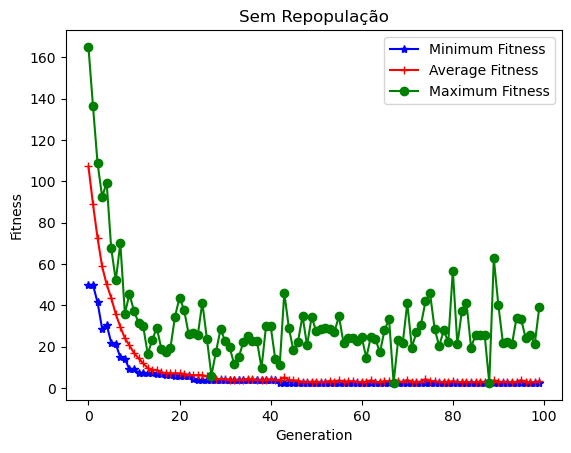

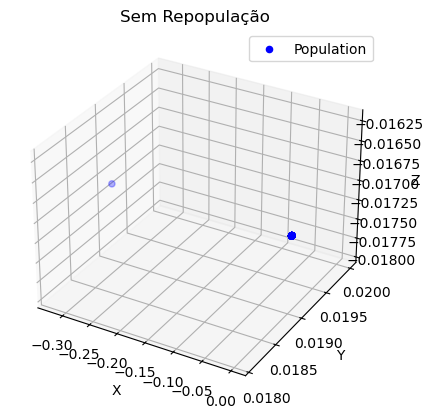


Alg evolutivo com repopulação

Best solution variables =
 [0.005117592933950199, 0.0038945782765386072, 0.03099841978500395, 3.163664691729906e-05, 0.04840420785577482, 0.017895012540464772, 0.02246583574259331, -0.008848593973504015, 0.06756188523247827, 0.010282877995255069]

Best solution fitness =  1.751576690201773


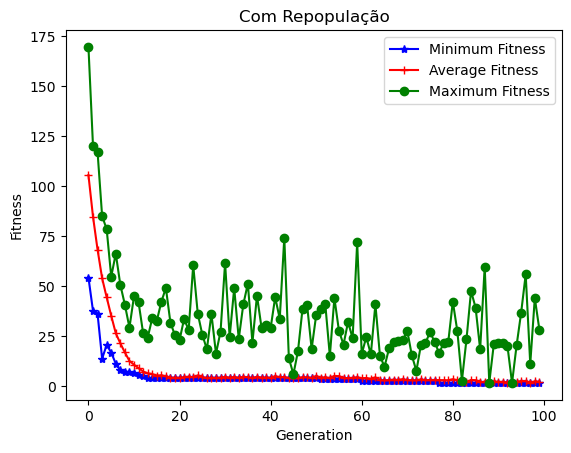

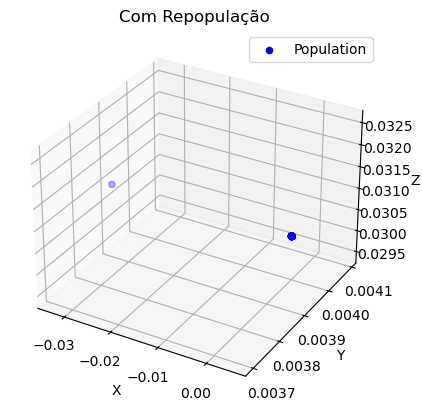

Total execution time: 1.68 seconds


In [3]:
import numpy as np
import math
from deap import base, creator, tools
import random
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
import pandas as pd


class EvolutionAlgorithm:
    def __init__(self, setup):
        self.setup = setup
        self.stats = tools.Statistics(key=lambda ind: ind.fitness.values)
        self.stats.register("avg", np.mean)
        self.stats.register("std", np.std)
        self.stats.register("min", np.min)
        self.stats.register("max", np.max)
        self.logbook = tools.Logbook()
        self.hof = tools.HallOfFame(1)
        self.pop = self.setup.toolbox.population(n=self.setup.POP_SIZE)
        self.hof.update(self.pop)
        self.repopulation_counter = 0
        self.allFitnessValues = []
        self.best_solutions_array = []

    def evaluate_population(self, population):
        fitnesses = map(self.setup.toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = [fit]

    def run(self):
        for g in range(self.setup.NGEN):
            offspring = self.setup.toolbox.select(self.pop, k=len(self.pop))
            offspring = [self.setup.toolbox.clone(ind) for ind in offspring]

            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < self.setup.CXPB:
                    self.setup.toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < self.setup.MUTPB:
                    self.setup.toolbox.mutate(mutant)
                    del mutant.fitness.values

            self.evaluate_population(offspring)

            for ind in self.pop:
         
                self.allFitnessValues.append(ind.fitness.values)

            self.hof.update(self.pop)

            if self.setup.num_repopulation != 0 and (g + 1) % self.setup.num_repopulation == 0:
                self.setup.toolbox.repopulate()

            else:
                self.pop[:] = offspring

            record = self.stats.compile(self.pop)
            self.logbook.record(gen=g, **record)

            self.best_solutions_array.append(self.hof[0].fitness.values)

        return self.pop, self.logbook, self.hof[0]


class Setup:
    def __init__(self):
        self.CXPB, self.MUTPB, self.NGEN, self.POP_SIZE = 0.9, 0.05, 100, 100
        self.IND_SIZE = 10
        self.evaluations = 0
        self.num_repopulation = int(self.NGEN * 0.20)

        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMin)

        self.toolbox = base.Toolbox()
        self.toolbox.register("attribute", random.random)
        self.toolbox.register("individual", tools.initRepeat, creator.Individual, self.toolbox.attribute,
                              n=self.IND_SIZE)
        self.toolbox.register("population", tools.initRepeat, list, self.toolbox.individual)

        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
        self.toolbox.register("evaluate", self.evaluate)
        self.toolbox.register("repopulate", self.repopulate_best_individuals)

    def evaluate(self, individual):
        self.evaluations += 1
        rastrigin = 10 * self.IND_SIZE
        for i in range(self.IND_SIZE):
            rastrigin += (individual[i] * individual[i] - 10 * (math.cos(2 * np.pi * individual[i])))
        return rastrigin

    def repopulate_best_individuals(self):
        if self.repopulation_counter == 25:
            best_individuals = self.hof[:self.setup.POP_SIZE]
            self.pop[:] = best_individuals
            self.repopulation_counter = 0


class DataExploration:
    def __init__(self):
        self.fit_array = []

    def calculate_stats(self, logbook):
        fit_avg = logbook.select("avg")
        fit_std = logbook.select("std")
        fit_min = logbook.select("min")
        fit_max = logbook.select("max")

        self.fit_array.append(fit_min)
        self.fit_array.append(fit_avg)
        self.fit_array.append(fit_max)
        self.fit_array.append(fit_std)

        return {
            "min_fitness": fit_min,
            "max_fitness": fit_max,
            "avg_fitness": fit_avg,
            "std_fitness": fit_std
        }

    def visualize(self, logbook, pop, repopulation=False):
        generation = logbook.select("gen")
        statics = self.calculate_stats(logbook)

        if repopulation:
            best_solution_index = statics["min_fitness"].index(min(statics["min_fitness"]))
            best_solution_variables = pop[best_solution_index]
            best_solution_fitness = statics["min_fitness"][best_solution_index]
        else:
            best_solution_index = statics["min_fitness"].index(min(statics["min_fitness"]))
            best_solution_variables = logbook.select("min")
            best_solution_fitness = min(statics["min_fitness"])

        print("\nBest solution variables =\n", best_solution_variables)
        print("\nBest solution fitness = ", best_solution_fitness)

        self.grafico_convergencia(generation, statics, repopulation)
        self.plot_population(pop, repopulation)

    def grafico_convergencia(self, gen, lista, repopulation=False):
        fig, ax1 = plt.subplots()
        if repopulation:
            ax1.set_title('Com Repopulação')
        else:
            ax1.set_title('Sem Repopulação')

        if repopulation:
            line1 = ax1.plot(gen, lista["min_fitness"], "*b-", label="Minimum Fitness")
        else:
            line1 = ax1.plot(gen, lista["min_fitness"], "*b-", label="Minimum Fitness")

        line2 = ax1.plot(gen, lista["avg_fitness"], "+r-", label="Average Fitness")
        line3 = ax1.plot(gen, lista["max_fitness"], "og-", label="Maximum Fitness")
        ax1.set_xlabel("Generation")
        ax1.set_ylabel("Fitness")
        lns = line1 + line2 + line3
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc="upper right")

    def plot_population(self, population, repopulation=False):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        if repopulation:
            ax.set_title('Com Repopulação')
        else:
            ax.set_title('Sem Repopulação')

        x_values = [ind[0] for ind in population]
        y_values = [ind[1] for ind in population]
        z_values = [ind[2] for ind in population]

        ax.scatter(x_values, y_values, z_values, c='b', label='Population')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        ax.grid(True)

        plt.show()


def main():
    tempo1 = time.time()

    data_visual = DataExploration()
    setup = Setup()
    alg = EvolutionAlgorithm(setup)
    alg_NO_repopulation = EvolutionAlgorithm(setup)

    # Sem repopulação
    print("\n\nAlg evolutivo Sem repopulação")
    alg_NO_repopulation.setup.num_repopulation = 0
    pop_without_repopulation, logbook_without_repopulation, best_without_repopulation = alg_NO_repopulation.run()
    data_visual.visualize(logbook_without_repopulation, pop_without_repopulation, repopulation=False)

    # Com repopulação
    print("\nAlg evolutivo com repopulação")
    pop_with_repopulation, logbook_with_repopulation, best_with_repopulation = alg.run()
    data_visual.visualize(logbook_with_repopulation, pop_with_repopulation, repopulation=True)

    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2 - tempo1, 2)} seconds")


if __name__ == "__main__":
    main()
